In [1]:
import requests
import json
import pandas
import numpy as np
import matplotlib.pyplot as plt
import requests
import xml.etree.ElementTree as ET
import pandas as pd
from requests.utils import unquote

/Users/ijongseung/house_electric/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### 공동주거 데이터 주소 수집

In [2]:
def get_data_building(kapt_codes):
    service_key = unquote("iCNxo2r0TdZnnV63%2FItO%2BQrOUqJakXCxx%2Fm20BsCp53DGZzJMDd1%2F7jOGLYQE%2BSn%2B1EQeSeIhUsTIyQ5dYgy4Q%3D%3D")
    url = "https://apis.data.go.kr/1613000/AptBasisInfoServiceV2/getAphusBassInfoV2"

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36",
        "Accept": "application/xml"
    }
    all_data = []
    missing_codes = []
    
    for kapt_code in kapt_codes:  
        params = {
            "serviceKey": service_key,
            "kaptCode": kapt_code,
            "_type": "xml"
        }

        response = requests.get(url, params=params, headers=headers)
        print("데이터 수집을 시작합니다.")
        
        if response.status_code == 200:
            root = ET.fromstring(response.text)
            items = root.findall(".//item")
            
            if not items:
                missing_codes.append(kapt_code)  # 코드가 없으면 추적 리스트에 추가
            
            for item in items:
                data_dict = {child.tag: child.text if child.text else 'N/A' for child in item}
                all_data.append(data_dict)
        else:
            missing_codes.append(kapt_code)  # 요청 실패 시 코드 추가

    # ✅ DataFrame 생성 (결과가 없을 경우 빈 DataFrame 반환)
    df = pd.DataFrame(all_data) if all_data else pd.DataFrame()
    
    if missing_codes:
        print(f"다음 kaptCode에 대한 데이터가 존재하지 않습니다: {missing_codes}")

    return df

### 시도코드를 이용한 데이터 수집

In [26]:
def get_kapt_codes(sido_code):
    
    service_key = unquote("iCNxo2r0TdZnnV63%2FItO%2BQrOUqJakXCxx%2Fm20BsCp53DGZzJMDd1%2F7jOGLYQE%2BSn%2B1EQeSeIhUsTIyQ5dYgy4Q%3D%3D")

    url = "https://apis.data.go.kr/1613000/AptListService2/getSidoAptList"

    params = {
        "serviceKey": service_key,
        "sidoCode": sido_code,  # 시도코드
        "pageNo": "1",  # 페이지번호
        "numOfRows": "100000",  # 목록 개수
        "_type": "xml"
    }

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36",
        "Accept": "application/xml"
    }

    response = requests.get(url, params=params, headers=headers)

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        data_list = []
        for item in root.findall(".//item"):
            data_dict = {child.tag: child.text if child.text else 'N/A' for child in item}
            data_list.append(data_dict)
    
        # DataFrame 생성
        
    df = pd.DataFrame(data_list)
        
    return df

In [27]:
# sido_cod = [11, 21,22,23,24,25,26,29,31,32,33,34,35,36,37,38,39]
seoul_sample = get_kapt_codes(11)
busan_sample = get_kapt_codes(21)
daegu_sample = get_kapt_codes(22)
incheon_sample = get_kapt_codes(23)
gwangju_sample = get_kapt_codes(24)
dageon_sample = get_kapt_codes(25)
yulsan_sample = get_kapt_codes(26)
sejong_sample = get_kapt_codes(29)
gyonggi_sample = get_kapt_codes(31)
gangwon_sample = get_kapt_codes(32)
chungbuk_sample = get_kapt_codes(33)
chungnam_sample = get_kapt_codes(34)
jeonbuk_sample = get_kapt_codes(35)
jeonnam_sample = get_kapt_codes(36)
gyeongbuk_sample = get_kapt_codes(37)
gyeongnam_sample = get_kapt_codes(38)
jeju_sample = get_kapt_codes(39)

In [46]:
print(get_kapt_codes(26))  # 울산광역시 (변수명 수정 필요)

        as1   as2  as3     bjdCode   kaptCode    kaptName  as4
0     부산광역시    북구  화명동  2632010200  A61612018     화명롯데낙천대  NaN
1     부산광역시    북구  만덕동  2632010300  A61672001     만덕대진아파트  NaN
2     부산광역시    북구  만덕동  2632010300  A61673103     신만덕쌍용예가  NaN
3     부산광역시    북구  화명동  2632010200  A61673301        화명현대  NaN
4     부산광역시    북구  화명동  2632010200  A61673302    삼한힐파크아파트  NaN
...     ...   ...  ...         ...        ...         ...  ...
1403  부산광역시    동구  수정동  2617010200  A10020980  북항에코하임센트럴뷰  NaN
1404  부산광역시  해운대구   중동  2635010600  A10021489  경동하나메르빌아파트  NaN
1405  부산광역시  부산진구  연지동  2623010600  A10021596     연지로얄아파트  NaN
1406  부산광역시   연제구  연산동  2647010200  A10021542  시청역이즈팰리스1차  NaN
1407  부산광역시  부산진구  가야동  2623011000  A10021471       한신센타뷰  NaN

[1408 rows x 7 columns]


In [9]:
# 공동주거 데이터의 정보 파일 -> 서울 정보만 수집한다 먼저
seoul_data = get_data_building(seoul_sample["kaptCode"].tolist())

데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작합니다.
데이터 수집을 시작

In [14]:
jeju_sample

""


In [13]:
# 제주
jeju_data = get_data_building(jeju_sample["kaptCode"].tolist())

KeyError: 'kaptCode'

In [10]:
seoul_data.to_csv("seoul_data1.csv", index=False)

### 공동주거 데이터의 주거코드를 입력받으면 전력사용량 데이터를 수집할 수 있는 코드 생성

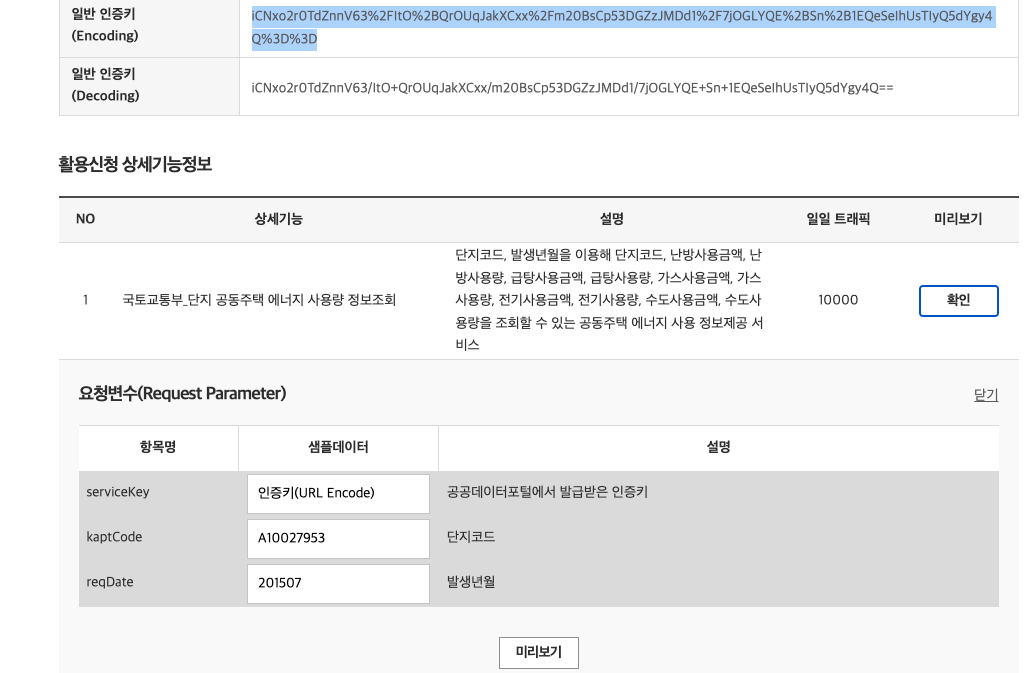